In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns

In [2]:
df = pd.read_csv('ratings.csv')

df.head()

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100836 entries, 0 to 100835
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   userId     100836 non-null  int64  
 1   movieId    100836 non-null  int64  
 2   rating     100836 non-null  float64
 3   timestamp  100836 non-null  int64  
dtypes: float64(1), int64(3)
memory usage: 3.1 MB


In [4]:
df.describe()

,userId,movieId,rating,timestamp
count,100836.000000,100836.000000,100836.000000,1.008360e+05
mean,326.127564,19435.295718,3.501557,1.205946e+09
std,182.618491,35530.987199,1.042529,2.162610e+08
min,1.000000,1.000000,0.500000,8.281246e+08
25%,177.000000,1199.000000,3.000000,1.019124e+09
50%,325.000000,2991.000000,3.500000,1.186087e+09
75%,477.000000,8122.000000,4.000000,1.435994e+09
max,610.000000,193609.000000,5.000000,1.537799e+09


In [5]:
df.isnull().sum()

userId       0
movieId      0
rating       0
timestamp    0
dtype: int64

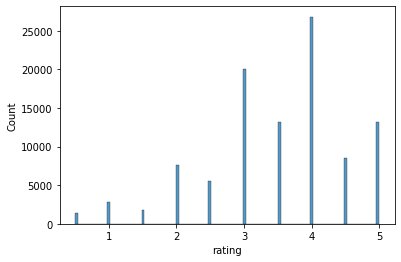

In [6]:
sns.histplot(df['rating'])
plt.show()

# Some Takeaways 

- The timestamp column  is not needed

In [7]:
df = df.drop('timestamp', axis=1)

df.head()

,userId,movieId,rating
0,1,1,4.0
1,1,3,4.0
2,1,6,4.0
3,1,47,5.0
4,1,50,5.0


In [8]:


# Create a pivot table with rows as users, columns as movies, and values as ratings
pivot_table = df.pivot_table(index='userId', columns='movieId', values='rating', fill_value=0)

# Display the transformed data
print(pivot_table)


movieId  1       2       3       4       5       6       7       8       \
userId                                                                    
1           4.0     0.0     4.0     0.0     0.0     4.0     0.0       0   
2           0.0     0.0     0.0     0.0     0.0     0.0     0.0       0   
3           0.0     0.0     0.0     0.0     0.0     0.0     0.0       0   
4           0.0     0.0     0.0     0.0     0.0     0.0     0.0       0   
5           4.0     0.0     0.0     0.0     0.0     0.0     0.0       0   
...         ...     ...     ...     ...     ...     ...     ...     ...   
606         2.5     0.0     0.0     0.0     0.0     0.0     2.5       0   
607         4.0     0.0     0.0     0.0     0.0     0.0     0.0       0   
608         2.5     2.0     2.0     0.0     0.0     0.0     0.0       0   
609         3.0     0.0     0.0     0.0     0.0     0.0     0.0       0   
610         5.0     0.0     0.0     0.0     0.0     5.0     0.0       0   

movieId  9       10     

In [9]:
from sklearn.cluster import KMeans

X = pivot_table.to_numpy()

In [10]:
kmeans = KMeans(n_clusters=3)

kmeans.fit(X)

c:\users\bob.t\appdata\local\programs\python\python39\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=3)

In [11]:
cluster_labels = kmeans.predict(X)

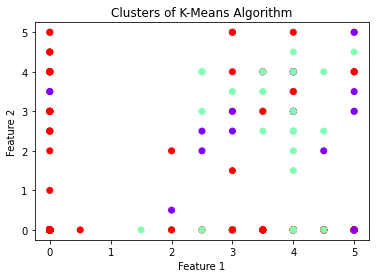

In [12]:
plt.scatter(X[:, 0], X[:, 1], c=cluster_labels, cmap='rainbow')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Clusters of K-Means Algorithm')
plt.show()

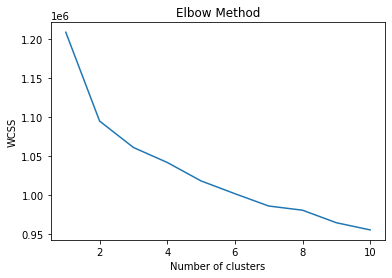

In [13]:
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [14]:
final_model = KMeans(n_clusters=2)

final_model.fit(X) 

c:\users\bob.t\appdata\local\programs\python\python39\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=2)

In [15]:
cluster_labels = final_model.fit_predict(X)

c:\users\bob.t\appdata\local\programs\python\python39\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [16]:
import numpy as np 

def movie_recommendations(user_id, num_recommendations, pivot_table, cluster_labels):
    # Find the cluster to which the user belongs
    user_cluster = cluster_labels[user_id - 1]  # Adjust the index as user IDs are 1-indexed in the DataFrame

    # Get the ratings of the user
    user_ratings = pivot_table.iloc[user_id - 1]

    # Get the movie IDs that the user has already rated
    rated_movies = user_ratings[user_ratings > 0].index

    # Get the indices of the movies in the user's cluster
    cluster_indices = np.where(cluster_labels == user_cluster)[0]

    # Get the average ratings of the movies in the user's cluster
    cluster_avg_ratings = X[cluster_indices].mean(axis=0)

    # Sort the movies in the user's cluster based on average ratings (highest first)
    sorted_movies = np.argsort(cluster_avg_ratings)[::-1]

    # Remove the movies that the user has already rated
    recommended_movies = [movie_id for movie_id in sorted_movies if movie_id not in rated_movies]

    # Get the top N movie recommendations
    top_recommendations = recommended_movies[:num_recommendations]

    return top_recommendations

# Example usage:
user_id = 1
num_recommendations = 5
recommendations = movie_recommendations(user_id, num_recommendations, pivot_table, cluster_labels)
print(f"Top {num_recommendations} movie recommendations for User {user_id}: {recommendations}")


Top 5 movie recommendations for User 1: [1938, 224, 257, 314, 897]


# Workspace

## Suggestions

## Train test spilt

In [102]:
pivot_table

movieId,1,2,3,4,5,6,7,8,9,10,...,193565,193567,193571,193573,193579,193581,193583,193585,193587,193609
userId,,,,,,,,,,,,,,,,,,,,,
1,4.0,0.0,4.0,0.0,0.0,4.0,0.0,0,0.0,0.0,...,0.0,0,0,0,0.0,0,0.0,0.0,0.0,0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,...,0.0,0,0,0,0.0,0,0.0,0.0,0.0,0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,...,0.0,0,0,0,0.0,0,0.0,0.0,0.0,0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,...,0.0,0,0,0,0.0,0,0.0,0.0,0.0,0
5,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,...,0.0,0,0,0,0.0,0,0.0,0.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
606,2.5,0.0,0.0,0.0,0.0,0.0,2.5,0,0.0,0.0,...,0.0,0,0,0,0.0,0,0.0,0.0,0.0,0
607,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,...,0.0,0,0,0,0.0,0,0.0,0.0,0.0,0
608,2.5,2.0,2.0,0.0,0.0,0.0,0.0,0,0.0,4.0,...,0.0,0,0,0,0.0,0,0.0,0.0,0.0,0


In [129]:
test = X[:2*(len(X)//10),:]

In [128]:
len(test)

122

In [134]:
train = X[len(test):len(X),:]

In [85]:
len(train)

488

# Evaluation

The idea is that for each user in the test data, we predict movies equal to the numer of movies they have rated highly(greater than 2). 

For example, user1 rated 5 movies highly. Therefore we predict five movies.

We then compare the predicted movies to the actual movies and calculate the percentage of movies we got right.

For example,
* use1's actual highly rated movies = [1,2,3,4,5]
* use1's predicted movies = [1,2,3,6,7]

In this case we got 3 right. therfore, (3/5 * 100) = 60 percent
<br><br>
**We do this for all users and find the average**


In [ ]:
def evaluation(data):

,0,1,2,3,4,5,6,7,8,9,...,9714,9715,9716,9717,9718,9719,9720,9721,9722,9723
0,4.0,0.0,4.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
117,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
118,3.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
119,0.0,0.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
120,4.0,0.0,0.0,0.0,3.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


array([1, 2, 2, 1, 8, 0, 7, 8, 2, 2, 8, 2, 2, 8, 7, 2, 7, 4, 1, 7, 7, 2,
       2, 7, 2, 8, 2, 4, 2, 2, 2, 8, 8, 2, 2, 2, 8, 8, 1, 8, 7, 1, 8, 2,
       4, 8, 2, 2, 2, 7, 1, 7, 2, 8, 2, 8, 1, 0, 1, 2, 2, 7, 4, 4, 2, 4,
       2, 3, 2, 2, 2, 2, 7, 2, 2, 7, 2, 2, 2, 7, 8, 7, 7, 0, 2, 7, 2, 2,
       2, 2, 4, 2, 8, 8, 1, 2, 2, 2, 8, 2, 2, 8, 4, 7, 4, 2, 8, 2, 8, 2,
       7, 2, 2, 2, 2, 2, 0, 2, 7, 2, 8, 4])

movieId,1,2,3,4,5,6,7,8,9,10,...,193565,193567,193571,193573,193579,193581,193583,193585,193587,193609
userId,,,,,,,,,,,,,,,,,,,,,
1,4.0,0.0,4.0,0.0,0.0,4.0,0.0,0,0.0,0.0,...,0.0,0,0,0,0.0,0,0.0,0.0,0.0,0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,...,0.0,0,0,0,0.0,0,0.0,0.0,0.0,0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,...,0.0,0,0,0,0.0,0,0.0,0.0,0.0,0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,...,0.0,0,0,0,0.0,0,0.0,0.0,0.0,0
5,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,...,0.0,0,0,0,0.0,0,0.0,0.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,...,0.0,0,0,0,0.0,0,0.0,0.0,0.0,0
97,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,...,0.0,0,0,0,0.0,0,0.0,0.0,0.0,0
98,4.5,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,...,0.0,0,0,0,0.0,0,0.0,0.0,0.0,0


array([4., 0., 4., ..., 0., 0., 0.])

In [123]:
for user_id in range(610):
    user_ratings = pivot_table.iloc[user_id]
    rated_movies = user_ratings[user_ratings > 0].index.values
    movies = movie_recommendations(user_id, len(rated_movies), pivot_table, cluster_labels)
    print(rated_movies)
    print(movies)
    break

[   1    3    6   47   50   70  101  110  151  157  163  216  223  231
  235  260  296  316  333  349  356  362  367  423  441  457  480  500
  527  543  552  553  590  592  593  596  608  648  661  673  733  736
  780  804  919  923  940  943  954 1009 1023 1024 1025 1029 1030 1031
 1032 1042 1049 1060 1073 1080 1089 1090 1092 1097 1127 1136 1196 1197
 1198 1206 1208 1210 1213 1214 1219 1220 1222 1224 1226 1240 1256 1258
 1265 1270 1275 1278 1282 1291 1298 1348 1377 1396 1408 1445 1473 1500
 1517 1552 1573 1580 1587 1617 1620 1625 1644 1676 1732 1777 1793 1804
 1805 1920 1927 1954 1967 2000 2005 2012 2018 2028 2033 2046 2048 2054
 2058 2078 2090 2093 2094 2096 2099 2105 2115 2116 2137 2139 2141 2143
 2161 2174 2193 2253 2268 2273 2291 2329 2338 2353 2366 2387 2389 2395
 2406 2414 2427 2450 2459 2470 2478 2492 2502 2528 2529 2542 2571 2580
 2596 2616 2617 2628 2640 2641 2644 2648 2654 2657 2692 2700 2716 2761
 2797 2826 2858 2872 2899 2916 2944 2947 2948 2949 2959 2985 2987 2991
 2993 

488

122